#📌 Extracción

In [359]:
import pandas as pd

In [360]:
datos = pd.read_json('/content/TelecomX_Data.json')

In [361]:
datos.info()
datos.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##Normalizando las columnas anidadas

In [362]:
#df_customer_normalize = pd.json_normalize(datos['customer'])
#df_phone_normalize = pd.json_normalize(datos['phone'])
#df_internet_normalize = pd.json_normalize(datos['internet'])
#df_account_normalize = pd.json_normalize(datos['account'])

In [363]:
datos1 = [pd.json_normalize(datos[col]) for col in ['customer', 'phone', 'internet', 'account']]

##Creando el DataFrame con todas las columnas

In [364]:
#df_normalized = pd.concat([datos[['customerID']],datos[['Churn']],df_customer_normalize, df_phone_normalize, df_internet_normalize, df_account_normalize], axis=1)
#df_normalized.head()

In [365]:
df_final = pd.concat([datos[['customerID']],datos[['Churn']],*datos1], axis=1)
df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [366]:
list(df_final.columns)


['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

##Opcional: guardar el archivo json normalizado

In [367]:
#df_final.to_json('telecomX_normalizado_original.json')

##Diccionario de datos

*    customerID: número de identificación único de cada cliente
*    Churn: si el cliente dejó o no la empresa
*    gender: género (masculino y femenino)
*    SeniorCitizen: información sobre si un cliente tiene o no una edad    igual o mayor a 65 años
*    Partner: si el cliente tiene o no una pareja
*    Dependents: si el cliente tiene o no dependientes
*    tenure: meses de contrato del cliente
*    PhoneService: suscripción al servicio telefónico
*    MultipleLines: suscripción a más de una línea telefónica
*   InternetService: suscripción a un proveedor de internet
*    OnlineSecurity: suscripción adicional de seguridad en línea
*    OnlineBackup: suscripción adicional de respaldo en línea
*    DeviceProtection: suscripción adicional de protección del dispositivo
*    TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
*    StreamingTV: suscripción de televisión por cable
*    StreamingMovies: suscripción de streaming de películas
*    Contract: tipo de contrato
*    PaperlessBilling: si el cliente prefiere recibir la factura en línea
*    PaymentMethod: forma de pago
*    Charges.Monthly: total de todos los servicios del cliente por mes
*    Charges.Total: total gastado por el cliente



#🔧 Transformación

##Columnas en letra minuscula

In [368]:
df_final.columns = df_final.columns.str.lower()

##Columnas sin espacios

In [369]:
df_final.columns = df_final.columns.str.strip()

In [370]:
df_final.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges.monthly',
       'charges.total'],
      dtype='object')

##Renombrando las columnas

In [371]:
df_final = df_final.rename(columns={'seniorcitizen': 'senior_citizen', 'phoneservice': 'phone_service',
                                    'multiplelines': 'multiple_lines', 'internetservice': 'internet_service',
                                    'onlinesecurity': 'online_security', 'onlinebackup': 'online_backup',
                                    'deviceprotection': 'device_protection', 'techsupport': 'tech_support',
                                    'streamingtv': 'streaming_tv', 'streamingmovies': 'streaming_movies',
                                    'paperlessbilling': 'paperless_billing', 'paymentmethod': 'payment_method',
                                    'charges.monthly': 'monthly_charges', 'charges.total': 'total_charges'})



In [372]:
df_final.columns

Index(['customerid', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges'],
      dtype='object')

##Valores unicos de las columnas

In [373]:
columnas = list(df_final.columns)

valores_unicos = {}

for columna in columnas:
    print(f'{columna}: {df_final[columna].unique()}')


customerid: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
senior_citizen: [0 1]
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone_service: ['Yes' 'No']
multiple_lines: ['No' 'Yes' 'No phone service']
internet_service: ['DSL' 'Fiber optic' 'No']
online_security: ['No' 'Yes' 'No internet service']
online_backup: ['Yes' 'No' 'No internet service']
device_protection: ['No' 'Yes' 'No internet service']
tech_support: ['Yes' 'No' 'No internet service']
streaming_tv: ['Yes' 'No' 'No internet service']
streaming_movies: ['No' 'Yes' 'No internet service']
contract: ['One year' 'Month-to-month' 'Two year']
paperless_billing: ['Yes' 'No']
payment_method: ['Mailed check' 'Electroni

##Determinando Valores vacios en la columna churn

In [374]:
df_final['churn'].value_counts()

,count
churn,
No,5174
Yes,1869
,224


In [375]:
vacios = (df_final['churn'] == '').sum()
vacios


np.int64(224)

##Porcentaje de los valores vacios

In [376]:
total_filas_churn = len(df_final)
porcentaje = (df_final['churn'].value_counts() / total_filas_churn) * 100
print(f'{porcentaje.iloc[0]:.2f}% Porcentaje de No')
print(f'{porcentaje.iloc[1]:.2f}% Porcentaje de Yes')
print(f'{porcentaje.iloc[2]:.2f}% Porcentaje de valores vacios ')

71.20% Porcentaje de No
25.72% Porcentaje de Yes
3.08% Porcentaje de valores vacios 


##Vemos que la columna 'churn' contiene 224 datos vacios
**Por que eliminar**:
* Esto representa el 3.08% del total de datos de la columna.
* Es un porcentaje bajo < 5%, no afectara significativamente el analisis.
* Evitamos sesgos en modelos predictivos.

###Elimina los valores vacios '' en la columna churn
* usando indexacion boolena.

In [377]:
# Devuelve el DataFrame donde churn no contiene '' vacios
df_clean = df_final[df_final['churn'] != ''].copy()
df_clean['churn'].value_counts()

,count
churn,
No,5174
Yes,1869


##Convertir la columnas total_charges a tipo float

In [378]:
df_clean['total_charges'] = pd.to_numeric(df_clean['total_charges'], errors='coerce')

##Convertir columnas especificas de (Yes) = 1 y (No) = 0

In [379]:
for col in ['churn', 'partner', 'dependents', 'phone_service', 'paperless_billing']:
  df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0}).astype(int)


##Valores vacios en las otras columnas

In [380]:
for col in columnas:
   print(f'{col}: {df_clean[col].isna().sum()}')

customerid: 0
churn: 0
gender: 0
senior_citizen: 0
partner: 0
dependents: 0
tenure: 0
phone_service: 0
multiple_lines: 0
internet_service: 0
online_security: 0
online_backup: 0
device_protection: 0
tech_support: 0
streaming_tv: 0
streaming_movies: 0
contract: 0
paperless_billing: 0
payment_method: 0
monthly_charges: 0
total_charges: 11


##Identificando la columna = total_charges, tiene datos vacios

In [381]:
faltantes = df_clean[df_clean['total_charges'].isna()]
print(f'Filas faltantes {len(faltantes)}')

Filas faltantes 11


In [382]:
df_filtrado = df_clean[df_clean['total_charges'].isna()]
df_filtrado

,customerid,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
975,1371-DWPAZ,0,Female,0,1,1,0,0,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,0,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,0,Female,0,1,1,0,1,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.00,NaN
1955,2775-SEFEE,0,Male,0,0,1,0,1,Yes,DSL,...,Yes,No,Yes,No,No,Two year,1,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,0,Male,0,1,1,0,1,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.70,NaN
2232,3115-CZMZD,0,Male,0,0,1,0,1,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.25,NaN
2308,3213-VVOLG,0,Male,0,1,1,0,1,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.35,NaN
2930,4075-WKNIU,0,Female,0,1,1,0,1,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,0,Mailed check,73.35,NaN
3134,4367-NUYAO,0,Male,0,1,1,0,1,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.75,NaN
3203,4472-LVYGI,0,Female,0,1,1,0,0,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,1,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,0,Female,0,1,1,0,1,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,0,Mailed check,80.85,NaN


##Analisis para determinar:

* si los datos faltantes en la columna 'total_charges', tienen relacion con la columuna 'churn' (si el cliente dejó o no la empresa)

In [383]:
# Análisis cruzado: tenure vs churn vs total_charges faltante
if 'tenure' in df_clean.columns:

    # Crear tabla cruzada
    tabla_cruzada = pd.crosstab(
        index=faltantes['tenure'],
        columns=faltantes['churn'],
        margins=True
    )

    tabla_cruzada

    # Clientes con tenure = 0 / meses de contrato
    tenure_0 = faltantes[faltantes['tenure'] == 0]
    if len(tenure_0) > 0:
        print(f"\nMeses de contrato del cliente (tenure) = 0 y total_charges faltantes: {len(tenure_0)}")
        print(f"Si el cliente dejó o no la empresa(Churn), distribución: {tenure_0['churn'].value_counts().to_dict()}")


Meses de contrato del cliente (tenure) = 0 y total_charges faltantes: 11
Si el cliente dejó o no la empresa(Churn), distribución: {0: 11}


##Interpretacion:
* tenure = 0 : Son clientes completamente nuevos (0 meses de antiguedad).
* churn = 0 : Ninguno ha abandonado (todos estan activos).
* total_charges = 11 : Tiene cargos totales faltantes, por que aun no han completado un mes de servicio.
* Estos clientes no han generado cargos aun

In [384]:
#Rellena los valores nulos en la columna total_charges con 0
df_clean['total_charges'] = df_clean['total_charges'].fillna(0)

##Reseteando el indice

In [385]:
df_clean = df_clean.reset_index(drop=True)

In [386]:
print(df_clean.columns.tolist())

['customerid', 'churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']


##Opcional: guardar el Dataframe limpio para el analisis

In [387]:
#df_clean.to_json('telecomX_ready_for_analysis.json')

#📊 Carga y análisis

In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

##Obteniendo archivos JSON de API
* Una forma común de acceder a las API es a través de la biblioteca requests. Para eso, también es necesario importar el módulo json: (En GoogleColab: !pip install requests para poder importar).
* Los datos de API se obtendrán con la función request.get('url'). Dentro de ella pasamos la dirección API.

In [389]:
datos = requests.get('https://raw.githubusercontent.com/LejImkoaj/proyecto-telecomX/refs/heads/main/json-files/telecomX_ready_for_analysis.json')
df = datos.json()
df = pd.DataFrame(df)
df.head()

,customerid,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


##Crear la columna: ```"Cuentas_Diarias"```. Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [390]:
df['cuentas_diarias'] = df['monthly_charges'] / 30
df.head()

,customerid,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [391]:
df.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


##Distribución de evasión

In [392]:
dis_ev = df['churn'].value_counts().reset_index()
dis_ev.columns = ['Churn', 'clientes']
dis_ev

,Churn,clientes
0,0,5174
1,1,1869


In [393]:
# Calcular porcentajes
total = dis_ev['clientes'].sum()
porcentajes = (dis_ev['clientes'] / total * 100).round(1)
tasa_churn = porcentajes[1]  # Índice 1 corresponde a Churn=1

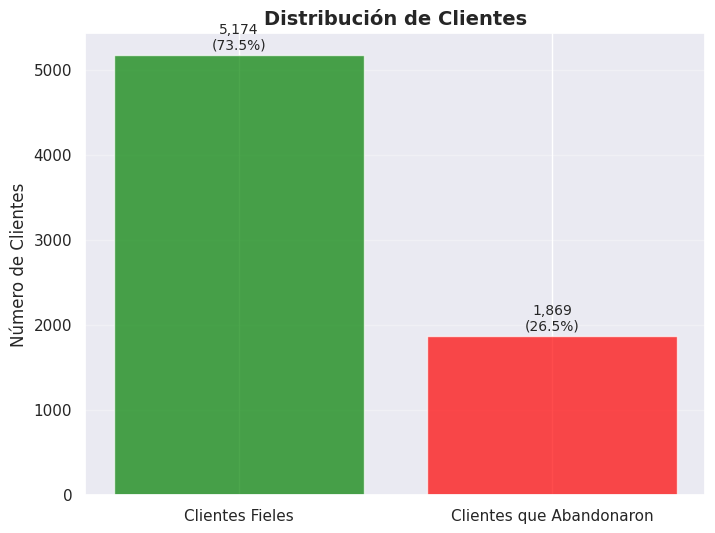

In [394]:
sns.set_theme()
sns.set_palette('Dark2')

# Crear figura
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico 1: Barras de distribución
categorias = ['Clientes Fieles', 'Clientes que Abandonaron']
colores = ['green', 'red']

bars = ax.bar(categorias, dis_ev['clientes'], color=colores, alpha=0.7)
ax.set_title('Distribución de Clientes', fontsize=14, fontweight='bold')
ax.set_ylabel('Número de Clientes', fontsize=12)
ax.grid(axis='y', alpha=0.3)


# Añadir valores en las barras
for bar, valor in zip(bars, dis_ev['clientes']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 30,
             f'{valor:,}\n({valor/total*100:.1f}%)',
             ha='center', va='bottom', fontsize=10)



plt.show()

##Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

##Evasion por Genero

In [395]:
evasion_genero = df.groupby('churn')['gender'].value_counts().unstack(fill_value=0)


In [396]:
pct_evasion_genero = (evasion_genero.div(evasion_genero.sum(axis=1), axis=0) * 100).round(1)
df_genero = pct_evasion_genero.reset_index()
df_genero.columns = ['churn', '%_female', '%_male']
df_genero = df_genero.sort_values('churn')
df_genero

,churn,%_female,%_male
0,0,49.3,50.7
1,1,50.2,49.8


In [397]:
# % Para género
tasa_churn_genero = (evasion_genero.loc[1] / (evasion_genero.loc[0] + evasion_genero.loc[1]) * 100).round(1)
# Convertir Series a DataFrame
df_genero_porcentaje = tasa_churn_genero.reset_index()
df_genero_porcentaje.columns = ['genero', '%_churn']
df_genero_porcentaje = df_genero_porcentaje.sort_values('%_churn', ascending=False)
df_genero_porcentaje


,genero,%_churn
0,Female,26.9
1,Male,26.2


##Evasion por Contrato

In [398]:
evasion_contrato = df.groupby('churn')['contract'].value_counts().unstack(fill_value=0)

In [399]:
pct_evasion_contrato = (evasion_contrato.div(evasion_contrato.sum(axis=1), axis=0) * 100).round(2)
df_contrato = pct_evasion_contrato.reset_index()
df_contrato.columns = ['churn', 'mes_a_mes', 'un_año', 'dos_años']
df_contrato

,churn,mes_a_mes,un_año,dos_años
0,0,42.91,25.26,31.83
1,1,88.55,8.88,2.57


In [400]:
# % Para contrato
tasa_churn_contrato = (evasion_contrato.loc[1] / (evasion_contrato.loc[0] + evasion_contrato.loc[1]) * 100).round(1)
# Convertir Series a DataFrame
df_contrato_porcentaje = tasa_churn_contrato.reset_index()
df_contrato_porcentaje.columns = ['contrato', '%_churn']
df_contrato_porcentaje = df_contrato_porcentaje.sort_values('%_churn', ascending=False)
df_contrato_porcentaje

,contrato,%_churn
0,Month-to-month,42.7
1,One year,11.3
2,Two year,2.8


##Evasion por Metodo de Pago

In [401]:
evasion_pago = df.groupby('churn')['payment_method'].value_counts().unstack(fill_value=0)

In [402]:
pct_evasion_pago = (evasion_pago.div(evasion_pago.sum(axis=1), axis=0) * 100).round(1)

df_pago = pct_evasion_pago.reset_index()
df_pago.columns = ['churn', 'cheque_electronico', 'cheque_por_correo', 'transfer_bancaria_auto', 'tarjeta_credito_auto']
df_pago

,churn,cheque_electronico,cheque_por_correo,transfer_bancaria_auto,tarjeta_credito_auto
0,0,24.9,24.9,25.0,25.2
1,1,13.8,12.4,57.3,16.5


In [403]:
# % Para método de pago
tasa_churn_pago = (evasion_pago.loc[1] / (evasion_pago.loc[0] + evasion_pago.loc[1]) * 100).round(1)
# Convertir Series a DataFrame
df_pago_porcentaje = tasa_churn_pago.reset_index()
df_pago_porcentaje.columns = ['metodo_pago', '%_churn']
df_pago_porcentaje = df_pago_porcentaje.sort_values('%_churn', ascending=False)
df_pago_porcentaje


,metodo_pago,%_churn
2,Electronic check,45.3
3,Mailed check,19.1
0,Bank transfer (automatic),16.7
1,Credit card (automatic),15.2


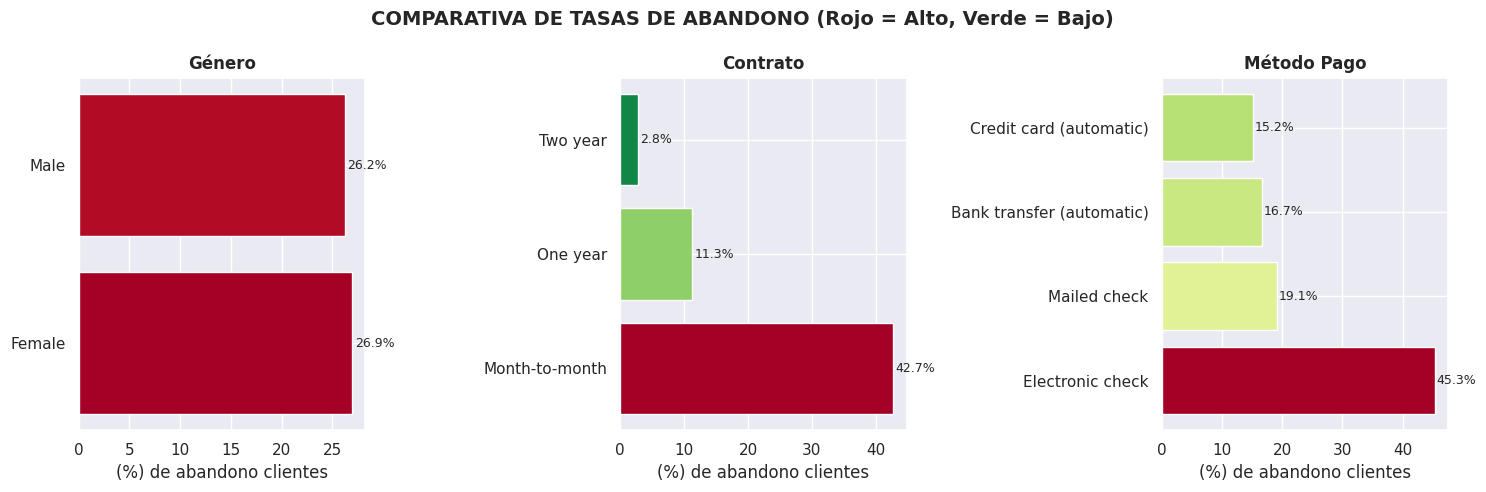

In [404]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (df, titulo) in enumerate(zip([df_genero_porcentaje, df_contrato_porcentaje, df_pago_porcentaje],
                                     ['Género', 'Contrato', 'Método Pago'])):
    ax = axes[i]

    # Crear colores: rojo para alto churn, verde para bajo
    max_churn = df['%_churn'].max()
    colors = plt.cm.RdYlGn_r(df['%_churn'] / max_churn)  # Rojo → Amarillo → Verde

    bars = ax.barh(df.iloc[:, 0], df['%_churn'], color=colors)

    # Añadir valores
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.3, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', va='center', fontsize=9)

    ax.set_title(titulo, fontweight='bold')
    ax.set_xlabel('(%) de abandono clientes')

plt.suptitle('COMPARATIVA DE TASAS DE ABANDONO (Rojo = Alto, Verde = Bajo)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

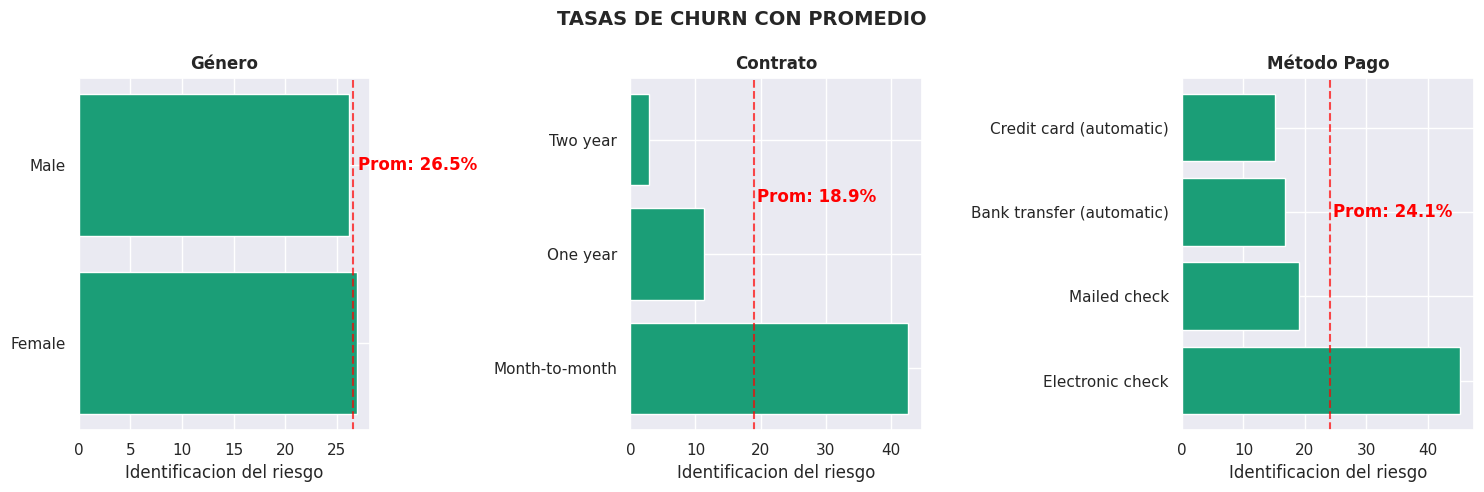

In [406]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

dataframes = [df_genero_porcentaje, df_contrato_porcentaje, df_pago_porcentaje]
titulos = ['Género', 'Contrato', 'Método Pago']

for i, (df, titulo) in enumerate(zip(dataframes, titulos)):
    ax = axes[i]
    bars = ax.barh(df.iloc[:, 0], df['%_churn'])

    # Calcular y marcar promedio
    promedio = df['%_churn'].mean()
    ax.axvline(x=promedio, color='red', linestyle='--', alpha=0.7)
    ax.text(promedio + 0.5, len(df)/2, f'Prom: {promedio:.1f}%',
            color='red', fontweight='bold', va='center')

    ax.set_title(titulo, fontweight='bold')
    ax.set_xlabel('Identificacion del riesgo')

plt.suptitle('TASAS DE CHURN CON PROMEDIO', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##Deduccion:
Categorias que tienen mayor riesgo de abadono:
* Contrato mes a mes 43%
* Pago con cheque electronico 45%


##Acciones de alto impacto

###Convertir contratos:
* mes a mes a => un año o dos años.
* penalizacion por cancelacion temprana.

###Promover pagos automatizados:
* Incentivos por usar la tarjeta de credito.
* quitar el cheque electronico.

#📄Informe final